# Jonathan Halverson
# Tuesday, February 14, 2017
# Analysis of fighter dimensions, stance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('fighters.csv', header=0)
df['WinRatio'] =  df['Win'] / (df['Win'] + df['Loss'] + df['Draw'])
df.head(3)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob
0,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,5.0,3.0,0.0,0,Tom Aaron,1983-07-03
1,Danny,Abbadi,The Assassin,71.0,155.0,NaN,Orthodox,4.0,6.0,0.0,0,Danny Abbadi,NaN
2,David,Abbott,Tank,72.0,265.0,NaN,Switch,10.0,14.0,0.0,0,David Abbott,1981-09-02


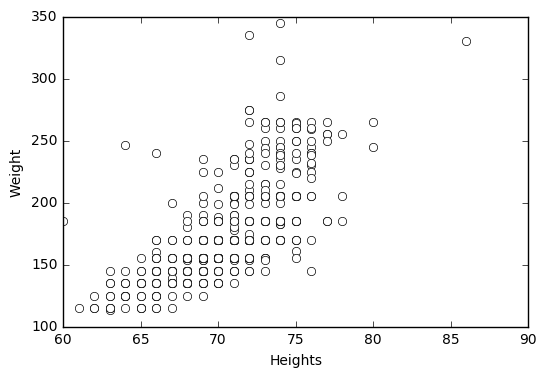

In [12]:
plt.plot(df.Height, df.Weight, 'wo')
plt.xlabel('Heights (inches)')
plt.ylabel('Weight (lbs.)')

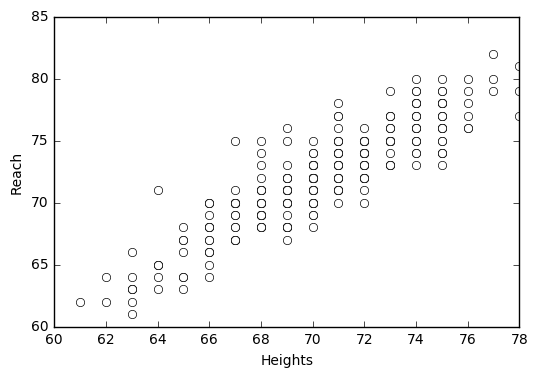

In [14]:
plt.plot(df.Height, df.Reach, 'wo')
plt.xlabel('Height (inches)')
plt.ylabel('Reach (inches)')

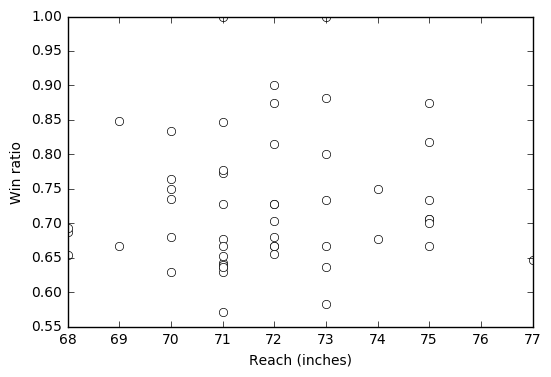

In [22]:
lw = df[df.Weight == 155.0][['WinRatio', 'Reach']].dropna()
plt.plot(lw.Reach, lw.WinRatio, 'wo')
plt.xlabel('Reach (inches)')
plt.ylabel('Win ratio')

In [23]:
from scipy.stats import pearsonr, spearmanr

pearsonr(lw.Reach, lw.WinRatio), spearmanr(lw.Reach, lw.WinRatio)

((0.076371829961548773, 0.59049110587963938),
 SpearmanrResult(correlation=0.11506963349928306, pvalue=0.41661306459632563))

In [5]:
stance = df[df.Stance != 'Open Stance'].groupby('Stance').agg({'WinRatio':[np.size, np.mean], 'Height':np.mean, 'Reach':np.mean})
stance

Height      Reach WinRatio          
               mean       mean     size      mean
Stance                                           
Orthodox  70.746479  72.234450    359.0  0.657345
Southpaw  70.463768  72.318182     70.0  0.672464
Switch    69.636364  71.625000     11.0  0.708507

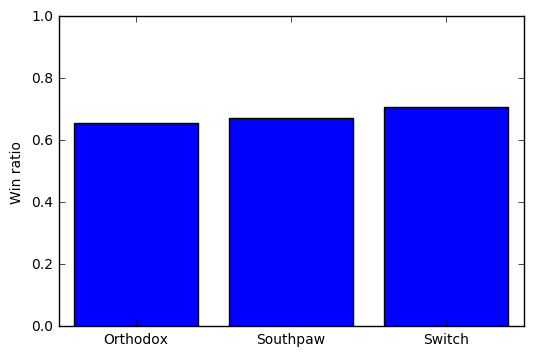

In [6]:
plt.bar(range(stance.shape[0]), stance[('WinRatio', 'mean')], tick_label=stance.index.values, align='center')
plt.ylim(0, 1)
plt.ylabel('Win ratio')

In [7]:
open_stance = df.WinRatio[df.Stance == 'Open Stance']
orthodox    = df.WinRatio[df.Stance == 'Orthodox']
southpaw    = df.WinRatio[df.Stance == 'Southpaw']
switch      = df.WinRatio[df.Stance == 'Switch']

In [8]:
print open_stance.count(), orthodox.count(), southpaw.count(), switch.count()
print open_stance.std(), orthodox.std(), southpaw.std(), switch.std()

1 359 70 11
nan 0.201487134884 0.210738946712 0.162134808223


(0, 1.2)

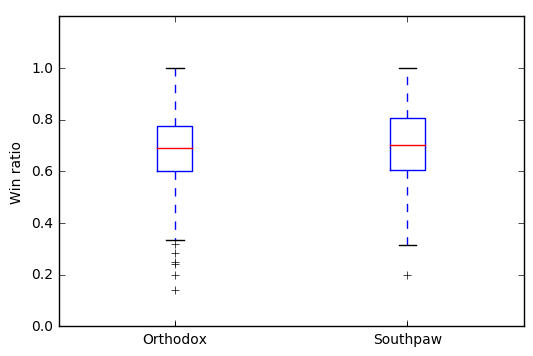

In [9]:
plt.boxplot((orthodox, southpaw), labels=('Orthodox', 'Southpaw'))
plt.ylabel('Win ratio')
plt.ylim(0, 1.2)

In [10]:
from scipy.stats import f_oneway

F_statistic, p_value = f_oneway(orthodox, southpaw)
F_statistic, p_value, p_value > 0.05

(0.32491889746522523, 0.56896623689312364, True)